In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

In [2]:
# import shutil
# p = Path('../datasets/CelebA/Img/img_align_celeba.zip')
# shutil.unpack_archive(p, p.parent)

<class 'numpy.ndarray'>
[[[253 231 194]
  [253 231 194]
  [253 231 194]
  ...
  [246 228 216]
  [255 237 223]
  [254 238 222]]

 [[253 231 194]
  [253 231 194]
  [253 231 194]
  ...
  [248 230 218]
  [255 237 223]
  [254 238 222]]

 [[253 231 194]
  [253 231 194]
  [253 231 194]
  ...
  [250 232 220]
  [255 238 224]
  [255 239 223]]

 ...

 [[140  74  26]
  [115  49   1]
  [146  78  33]
  ...
  [122  55  28]
  [123  56  30]
  [122  56  30]]

 [[130  62  15]
  [138  70  23]
  [166  98  53]
  ...
  [118  49  20]
  [120  50  24]
  [118  51  24]]

 [[168 100  53]
  [204 136  89]
  [245 177 132]
  ...
  [118  49  20]
  [120  50  24]
  [120  50  24]]]
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)


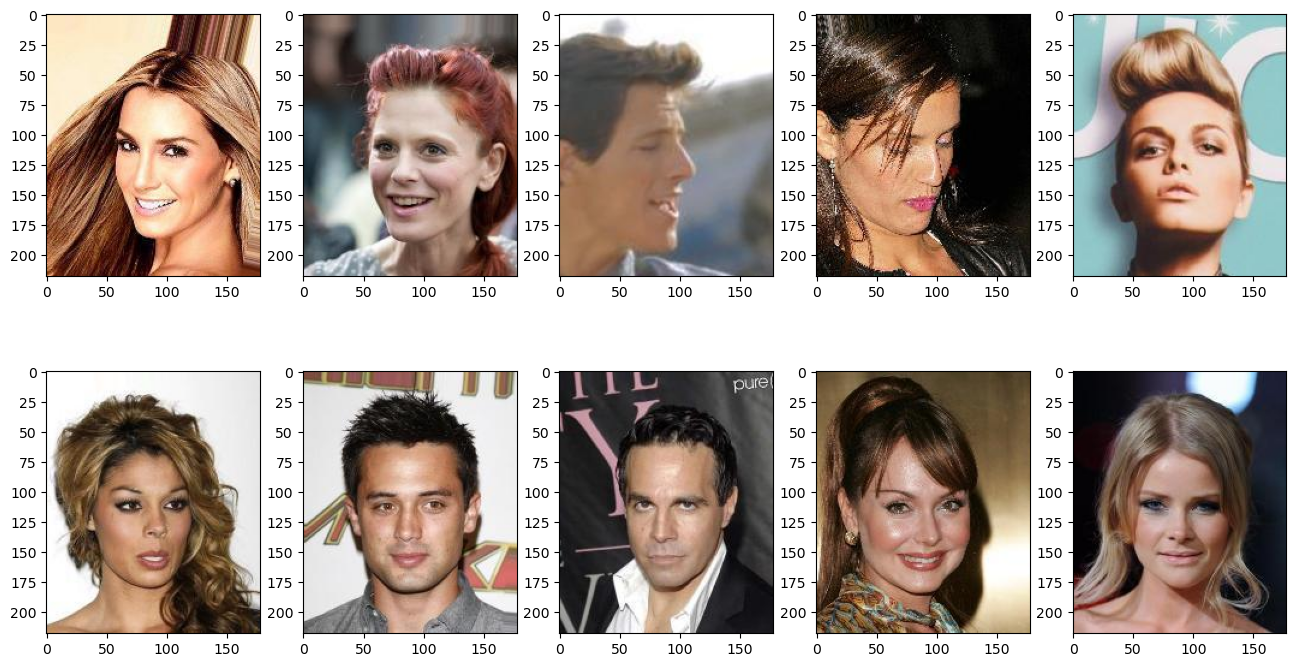

In [3]:
img_dir = Path('../datasets/CelebA/Img/img_align_celeba')
fig = plt.figure(figsize=(16, 8.5))

for i, img in enumerate(img_dir.iterdir()):
    if i >= 10:
        break
    ax = fig.add_subplot(2, 5, i + 1)
    # ax.set_xticks([]); ax.set_yticks([])
    img = plt.imread(str(img))
    if i == 0:
        print(type(img))
        print(img)
    print(img.shape)
    ax.imshow(img)

In [4]:
celeba_dir = Path('../datasets/CelebA')
label_path = celeba_dir / 'Anno/identity_CelebA.txt'
df = pd.read_csv(label_path, sep='\s+', names=['filename', 'label'])
df

,filename,label
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [5]:
df.shape

(202599, 2)

In [6]:
df.columns

Index(['filename', 'label'], dtype='object')

In [7]:
df['label'].value_counts()

label
3227    35
2820    35
3782    35
3745    34
3699    34
        ..
8815     1
9770     1
2264     1
9075     1
3481     1
Name: count, Length: 10177, dtype: int64

In [8]:
celeba_dir = Path('../datasets/CelebA')
label_txt = celeba_dir / "Anno/list_attr_celeba.txt"
attr_df = pd.read_csv(str(label_txt), sep='\s+', skiprows=1)
attr_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [9]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses           202599 non-null  int64

In [10]:
# 加载图片
img_dir = celeba_dir / 'Img/img_align_celeba'
img_dir = img_dir.resolve()


def load_img(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)  #此处的image取值[0, 255)
    return image, label


# ds_files_labels = tf.data.Dataset.from_tensor_slices((attr_df.index, attr_df.Male))
# ds_images_labels = ds_files_labels.map(load_and_process)

# 划分训练集、验证集、测试集
partition_txt = celeba_dir / 'Eval/list_eval_partition.txt'
partition_df = pd.read_csv(partition_txt, sep='\s+', names=['img_name', 'sign'])
train_idx = partition_df.loc[partition_df.sign == 0, 'img_name']
valid_idx = partition_df.loc[partition_df.sign == 1, 'img_name']
test_idx = partition_df.loc[partition_df.sign == 2, 'img_name']


def split_dataset(idx):
    """idx就是图片名字"""
    # 拼接图片路径
    img_paths = [str(img_dir / i) for i in idx]
    labels = attr_df.loc[idx, 'Male']
    labels = list(map(lambda x: 1 if x == 1 else 0, labels))
    ds = tf.data.Dataset.from_tensor_slices((img_paths, labels))
    return ds.map(load_img)


celeba_train = split_dataset(train_idx)
celeba_valid = split_dataset(valid_idx)
celeba_test = split_dataset(test_idx)

In [11]:
# 此处只取部分
celeba_train = celeba_train.take(16000)
celeba_valid = celeba_valid.take(1000)

### Image transformation and data augmentation

In [12]:
def preprocess(image, label, size=(64, 64), mode='train'):
    if mode == 'train':
        image_cropped = tf.image.random_crop(image, (178, 178, 3))
        image_resized = tf.image.resize(image_cropped, size)
        image_flip = tf.image.random_flip_left_right(image_resized)
        return image_flip / 255., tf.cast(label, tf.int32)

    else:
        image_cropped = tf.image.crop_to_bounding_box(image, 20, 0, 178, 178)
        image_resized = tf.image.resize(image_cropped, size)
        return image_resized / 255., tf.cast(label, tf.int32)

# # testing:
# item = next(iter(celeba_train))
# preprocess(item[0], item[1], mode='train')

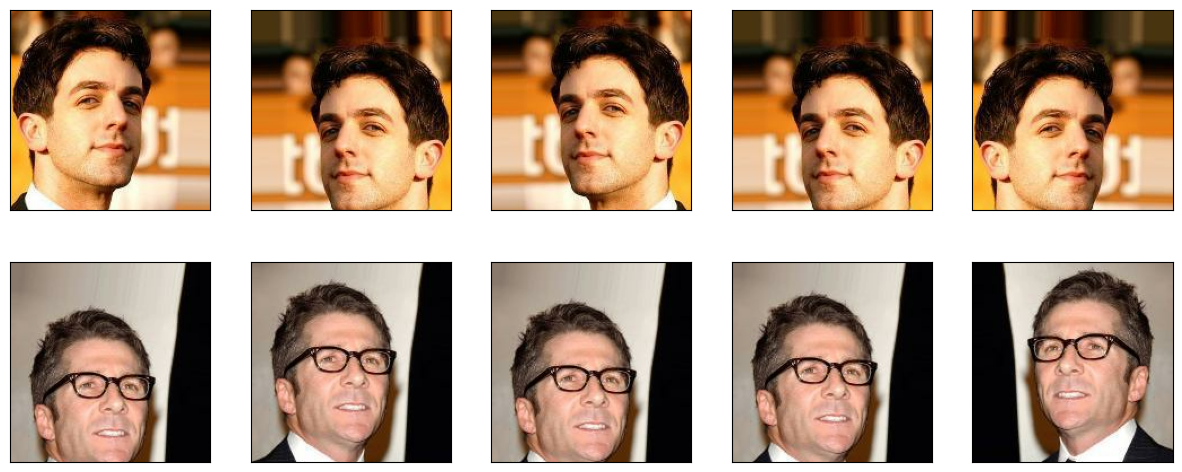

In [13]:
# 随意查看一下
tf.random.set_seed(1)

ds = celeba_train.shuffle(1000, reshuffle_each_iteration=False)
ds = ds.take(2).repeat(5)

ds = ds.map(lambda X, y: preprocess(X, y, size=(178, 178), mode='train'))

fig = plt.figure(figsize=(15, 6))
for j, example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j // 2 + (j % 2) * 5 + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0])

#plt.savefig('figures/15_16.png', dpi=300)
plt.show()

In [14]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
IMAGE_SIZE = (64, 64)
steps_per_epoch = np.ceil(16000 / BATCH_SIZE)
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda X, y: preprocess(X, y, size=IMAGE_SIZE, mode='train'))
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

ds_valid = celeba_valid.map(
    lambda X, y: preprocess(X, y, size=IMAGE_SIZE, mode='eval'))
ds_valid = ds_valid.batch(BATCH_SIZE)

ds_test = celeba_test.map(
    lambda X, y: preprocess(X, y, size=IMAGE_SIZE, mode='eval'))
ds_test = ds_test.batch(BATCH_SIZE)

500.0


### Training a CNN gender classifier

* **Global Average Pooling**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation=None)
])

tf.random.set_seed(1)

model.build(input_shape=(None, 64, 64, 3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_valid, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
500/500 [==============================] - 20s 26ms/step - loss: 0.6369 - accuracy: 0.6192 - val_loss: 0.5886 - val_accuracy: 0.6040
Epoch 2/20
500/500 [==============================] - 13s 25ms/step - loss: 0.5371 - accuracy: 0.7146 - val_loss: 0.5039 - val_accuracy: 0.6430
Epoch 3/20
500/500 [==============================] - 13s 25ms/step - loss: 0.4832 - accuracy: 0.7514 - val_loss: 0.4402 - val_accuracy: 0.7230
Epoch 4/20
500/500 [==============================] - 13s 25ms/step - loss: 0.4517 - accuracy: 0.7776 - val_loss: 0.4440 - val_accuracy: 0.6880
Epoch 5/20
500/500 [==============================] - 13s 25ms/step - loss: 0.4218 - accuracy: 0.7926 - val_loss: 0.3492 - val_accuracy: 0.8330
Epoch 6/20
500/500 [==============================] - 13s 25ms/step - loss: 0.4031 - accuracy: 0.8091 - val_loss: 0.3684 - val_accuracy: 0.7850
Epoch 7/20
500/500 [==============================] - 13s 25ms/step - loss: 0.3819 - accuracy: 0.8188 - val_loss: 0.3641 - val_accuracy:

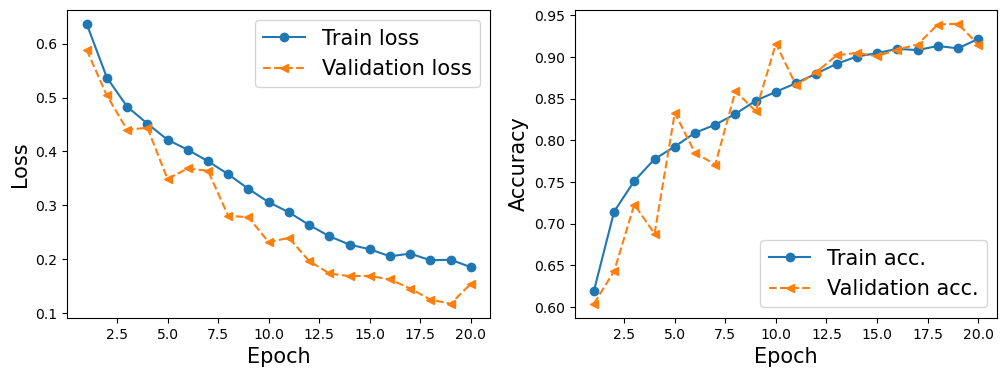

In [17]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_18.png', dpi=300)
plt.show()

In [18]:
results = model.evaluate(ds_test, verbose=0)
print('Test Acc: {:.2f}%'.format(results[1]*100))

Test Acc: 90.68%


In [19]:
history = model.fit(ds_train, validation_data=ds_valid,
                    epochs=30, initial_epoch=20, steps_per_epoch=steps_per_epoch)

Epoch 21/30
500/500 [==============================] - 14s 26ms/step - loss: 0.1846 - accuracy: 0.9203 - val_loss: 0.1238 - val_accuracy: 0.9310
Epoch 22/30
500/500 [==============================] - 13s 27ms/step - loss: 0.1825 - accuracy: 0.9223 - val_loss: 0.1550 - val_accuracy: 0.9090
Epoch 23/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1746 - accuracy: 0.9269 - val_loss: 0.1383 - val_accuracy: 0.9160
Epoch 24/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1737 - accuracy: 0.9239 - val_loss: 0.1101 - val_accuracy: 0.9500
Epoch 25/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1741 - accuracy: 0.9245 - val_loss: 0.1202 - val_accuracy: 0.9330
Epoch 26/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1663 - accuracy: 0.9283 - val_loss: 0.0998 - val_accuracy: 0.9660
Epoch 27/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1650 - accuracy: 0.9298 - val_loss: 0.1027 - val_ac

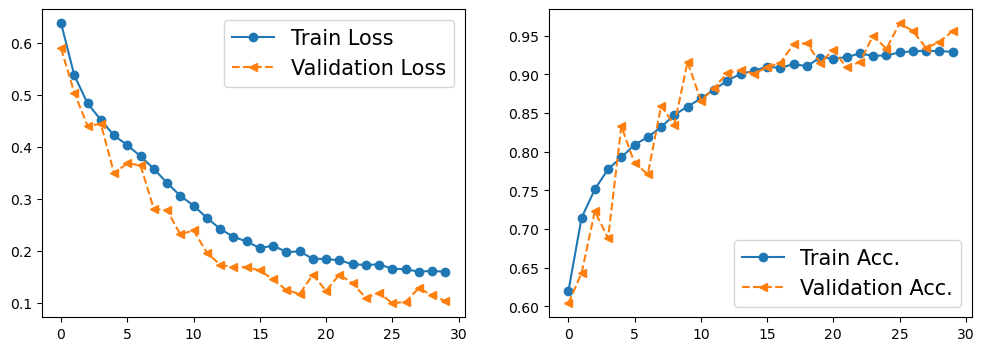

In [20]:
hist2 = history.history
x_arr = np.arange(len(hist['loss'] + hist2['loss']))


fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss']+hist2['loss'],
        '-o', label='Train Loss')
ax.plot(x_arr, hist['val_loss']+hist2['val_loss'],
        '--<', label='Validation Loss')
ax.legend(fontsize=15)


ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy']+hist2['accuracy'],
        '-o', label='Train Acc.')
ax.plot(x_arr, hist['val_accuracy']+hist2['val_accuracy'],
        '--<', label='Validation Acc.')
ax.legend(fontsize=15)
plt.show()

In [21]:
results = model.evaluate(ds_test, verbose=0)
print('Test Acc: {:.2f}%'.format(results[1]*100))

Test Acc: 94.79%


1/1 [==============================] - 3s 3s/step


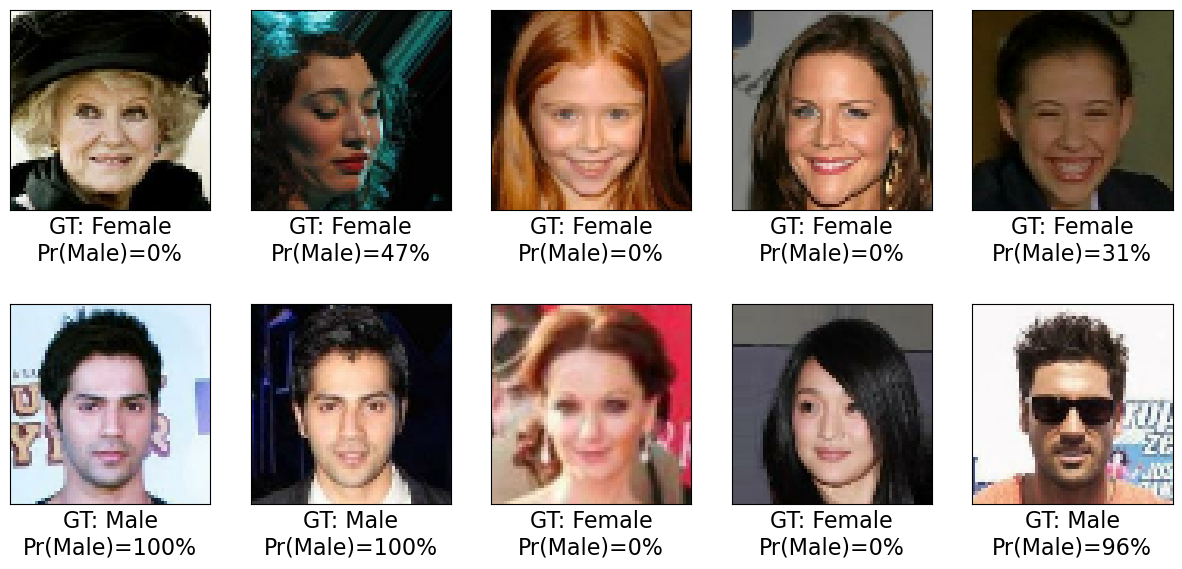

In [22]:
ds = ds_test.unbatch().take(10)

pred_logits = model.predict(ds.batch(10))
probas = tf.sigmoid(pred_logits)
probas = probas.numpy().flatten()*100

fig = plt.figure(figsize=(15, 7))
for j,example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    if example[1].numpy() == 1:
        label='Male'
    else:
        label = 'Female'
    ax.text(
        0.5, -0.15,
        'GT: {:s}\nPr(Male)={:.0f}%'.format(label, probas[j]),
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

#plt.savefig('figures/figures-15_19.png', dpi=300)
plt.show()

以上是用下方方式进行训练：弊端是如果不能被BATCH_SIZE整除，则相邻的epoch开始一部分数据会被使用两次
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

In [23]:
model.save('models/celeba-cnn.h5')